In [1]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

### MLP

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [3]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5589 - acc: 0.7993 - val_loss: 0.8059 - val_acc: 0.7553
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3964 - acc: 0.8560 - val_loss: 0.4173 - val_acc: 0.8522
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3561 - acc: 0.8708 - val_loss: 0.3703 - val_acc: 0.8633
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3279 - acc: 0.8810 - val_loss: 0.3168 - val_acc: 0.8838
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3100 - acc: 0.8858 - val_loss: 0.3174 - val_acc: 0.8808
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3001 - acc: 0.8909 - val_loss: 0.3191 - val_acc: 0.8844
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2861 - acc: 0.8944 - val_loss: 0.3322 - val_acc: 0.8795
Epoch 8/10
782/782 [==============================] - 17s 22ms

In [5]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3704 - acc: 0.8717


### CNN

In [6]:
(X_cnn, y_cnn), (X_test_cnn, y_test_cnn) = fashion_mnist.load_data()

In [7]:
y_cnn=to_categorical(y_cnn)
y_train_cnn=y_cnn
y_test_cnn=to_categorical(y_test_cnn)

In [8]:
X_train_cnn = X_cnn.reshape((60000, 28,28,1))
X_train_cnn = X_train_cnn/255

X_test_cnn = X_test_cnn.reshape((10000, 28,28,1))
X_test_cnn = X_test_cnn/255

In [9]:
net = models.Sequential()
net.add(layers.Conv2D(64,[3,3], activation='relu', input_shape=(28,28,1)))
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(128,[3,3], activation='relu'))
net.add(layers.MaxPooling2D((2,2)))
net.add(layers.Conv2D(128,[3,3], activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [10]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [11]:
net.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 56s 118ms/step - loss: 0.5290 - acc: 0.8029
Epoch 2/10
469/469 [==============================] - 57s 122ms/step - loss: 0.3075 - acc: 0.8884
Epoch 3/10
469/469 [==============================] - 50s 106ms/step - loss: 0.2574 - acc: 0.9052
Epoch 4/10
469/469 [==============================] - 49s 105ms/step - loss: 0.2241 - acc: 0.9161
Epoch 5/10
469/469 [==============================] - 49s 105ms/step - loss: 0.1956 - acc: 0.9268
Epoch 6/10
469/469 [==============================] - ETA: 0s - loss: 0.1713 - acc: 0.936 - 51s 108ms/step - loss: 0.1713 - acc: 0.9361
Epoch 7/10
469/469 [==============================] - 54s 115ms/step - loss: 0.1498 - acc: 0.9436
Epoch 8/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1283 - acc: 0.9521
Epoch 9/10
469/469 [==============================] - 78s 165ms/step - loss: 0.1117 - acc: 0.9587
Epoch 10/10
469/469 [==============================] - 69s 146ms/step - loss: 0.

In [12]:
test_loss, test_acc = net.evaluate(X_test_cnn,y_test_cnn)

313/313 [==============================] - 2s 8ms/step - loss: 0.2987 - acc: 0.9124


In [13]:
test_loss, test_acc = net.evaluate(X_train_cnn,y_train_cnn)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0834 - acc: 0.9683


In [14]:
X_val_cnn = X_train_cnn[:10000]
partial_X_train_cnn = X_train_cnn[10000:]

In [15]:
y_val_cnn = y_train_cnn[:10000]
partial_y_train_cnn = y_train_cnn[10000:]

In [16]:
val_cnn = net.fit(partial_X_train_cnn,partial_y_train_cnn, epochs=10, batch_size=128,validation_data=(X_val_cnn, y_val_cnn))

Epoch 1/10
391/391 [==============================] - 59s 151ms/step - loss: 0.0822 - acc: 0.9691 - val_loss: 0.0888 - val_acc: 0.9654
Epoch 2/10
391/391 [==============================] - 59s 151ms/step - loss: 0.0668 - acc: 0.9747 - val_loss: 0.0876 - val_acc: 0.9668
Epoch 3/10
391/391 [==============================] - 59s 152ms/step - loss: 0.0569 - acc: 0.9786 - val_loss: 0.0960 - val_acc: 0.9614
Epoch 4/10
391/391 [==============================] - 61s 156ms/step - loss: 0.0496 - acc: 0.9816 - val_loss: 0.1041 - val_acc: 0.9609
Epoch 5/10
391/391 [==============================] - 59s 151ms/step - loss: 0.0415 - acc: 0.9842 - val_loss: 0.1409 - val_acc: 0.9530
Epoch 6/10
391/391 [==============================] - 58s 149ms/step - loss: 0.0399 - acc: 0.9853 - val_loss: 0.1133 - val_acc: 0.9598
Epoch 7/10
391/391 [==============================] - 52s 133ms/step - loss: 0.0356 - acc: 0.9870 - val_loss: 0.1371 - val_acc: 0.9549
Epoch 8/10
391/391 [==============================] - 4

In [17]:
val_cnn_dict = val_cnn.history
loss = val_cnn_dict['loss']
val_loss = val_cnn_dict['val_loss']

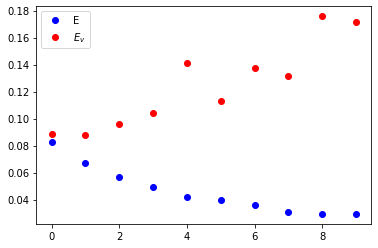

In [18]:
x = np.arange(0, len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

## MLP와 CNN 비교
### MLP의 경우 test accuracy 값이 0.8717 train 한 값이 0.88정도 된다. CNN은 test accuracy 값이 0.9124 train 한 값이 0.96정도이다. test 값은 4.07%, train 한 값은 8%정도로 크게 차이난다. 다만 train 할 때 소요되는 시간은 MLP는 약 17.3초 CNN은 52.8초 정도로 큰 차이를 보인다. 빠른 시간 덜 정확한 분석을 위해서는 MLP를 사용하고 시간이 다소 걸리더라도 높은 정확도를 위해서는 CNN을 사용하는 것이 좋다.